# Image Augmentation using Keras

### https://keras.io/api/preprocessing/image/

In [73]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator    # Library which helps in image  

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense


In [78]:
path = 'train/1/001.jpg'                                              # Path where the image is stored
image = tf.keras.preprocessing.image.load_img(path)                   # Import the image
input_arr = tf.keras.preprocessing.image.img_to_array(image)          # Convert image to array
input_ar = np.array([input_arr])                                      # Convert single image to a batch.

In [80]:
print(input_arr.shape)                                                # Array to store data of 1 image        
print(input_ar.shape)                                                 # Array to store data of multiple images

(224, 224, 3)
(1, 224, 224, 3)


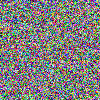

In [98]:
img_data = np.random.random(size=(100, 100, 3))                       # A random 3-D array 
img = tf.keras.preprocessing.image.array_to_img(img_data)             # Image cretaed by using the values of the array
img

In [106]:
model=tf.keras.Sequential(
[
    Conv2D(filters=1, kernel_size=(3, 3), activation='relu', strides=1, padding='same'),    
    MaxPooling2D(pool_size=(4, 4)),
    
    Flatten(),
    Dense(6,activation="softmax")
    
])

model.compile(loss='CategoricalCrossentropy',
              optimizer='adam',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(                                  # Real time data augmentation
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(            # Loads the File which contains the images.
        'train',                                                # Returns x (numpy array containing a batch of images)
        target_size=(150, 150),                                 # and correcponding labels
        class_mode='categorical')

model.fit(
        train_generator,
        batch_size=100,
        epochs=1)


Found 893 images belonging to 6 classes.
28/28 [==============================] - 13s 476ms/step - loss: 1.8840 - accuracy: 0.1892
